In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cPickle as pickle
import itertools, time
import scipy.stats, math
from collections import OrderedDict
from operator import mul

import matplotlib.patches as patches
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.patches import Rectangle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
from matplotlib.patches import Circle, PathPatch

import matplotlib.path as mplPath
from matplotlib import gridspec
from matplotlib.patches import Ellipse

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [37]:
mask = np.ones((2527, 2463), dtype = bool)

#vertices = np.array([1245,  1287,    2464,  1287,   2464,  1255,    1245,  1245])
#vertices = np.array([1245,  1280,    2464,  1283,    2464,  1255,    1245,  1250])
vertices = np.array([1245,  1320,    2464,  1340,    2464,  1230,    1245,  1210])
bbPath = mplPath.Path(np.array([[vertices[0], vertices[1]],
                                [vertices[2], vertices[3]],
                                [vertices[4], vertices[5]],
                                [vertices[6], vertices[7]],]))
for x in range(mask.shape[1]):
    for y in range(mask.shape[0]):
        if bbPath.contains_point((x, y)):
            mask[y, x] = False
        
ebounds = np.array([1145.,  1310.,    1175.,  1345.])
#ebounds = np.array([1207.,  1255.,    1240.,  1287.])
xwidth, ywidth = ebounds[1] - ebounds[0], ebounds[3] - ebounds[2]
center = np.array([int(xwidth/2.0 + ebounds[0]), int(ywidth/2.0 + ebounds[2])])
e = Ellipse(xy=center, width=xwidth, height=ywidth)
for xpoint in np.arange(ebounds[0]-5, ebounds[1]+5):
    for ypoint in np.arange(ebounds[2]-5, ebounds[3]+5):
        if e.contains_point((xpoint, ypoint)):
            mask[int(ypoint), int(xpoint)] = False

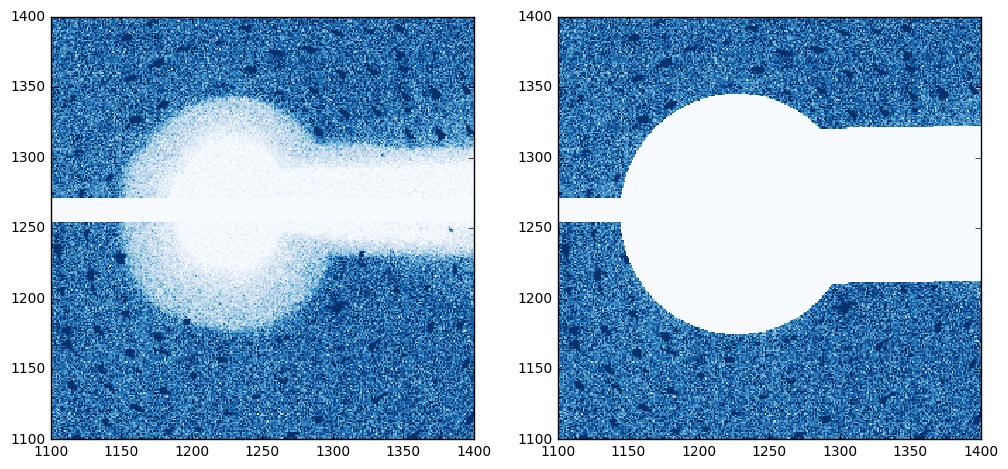

In [44]:
num = "100"
img = np.load("/Users/fpoitevi/gdrive/Toolkit/diffuse/jobs/A3_4/A3_4_00%s.npy" %num)
#img = np.load("/Users/apeck/Desktop/diffuse_scatter/ksi/diffuse/M116A_228K_1/cbf_as_npy/M116A_228K_1_2_00%s.npy" %num)
#img = np.load("/Users/apeck/Desktop/diffuse_scatter/ksi/diffuse/M105A_100K_2/cbf_as_npy/M105A_100K_2_1_00%s.npy" %num)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(img, cmap='Blues', vmin=0, vmax=20, interpolation='None')

m_img = img.copy()
m_img[mask==False] = 0
ax2.imshow(m_img, cmap='Blues', vmin=0, vmax=20, interpolation='None')

for ax in [ax1, ax2]:
    ax.set_ylim(1100, 1400)
    #ax.set_ylim(1650, 1750)
    ax.set_xlim(1100, 1400)
    #ax.set_aspect(0.08)

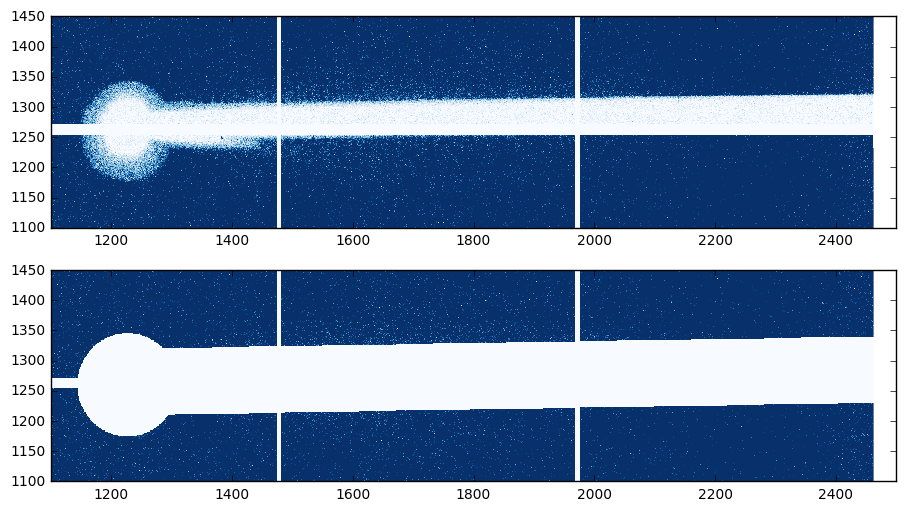

In [45]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

ax1.imshow(img, cmap='Blues', vmin=0, vmax=10, interpolation='None')

m_img = img.copy()
m_img[mask==False] = 0
ax2.imshow(m_img, cmap='Blues', vmin=0, vmax=10, interpolation='None')

for ax in [ax1, ax2]:
    ax.set_ylim(1100, 1450)
    #ax.set_ylim(1650, 1750)
    ax.set_xlim(1100, 2500)
    #ax.set_aspect(0.08)

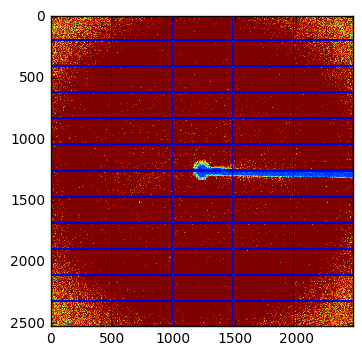

In [46]:
plt.imshow(img,vmax=10)